In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))

In [3]:
y_true = (0.5 * x_data) + 5 + noise

In [4]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y True'])

In [5]:
my_data = pd.concat([x_df,y_df], axis=1)

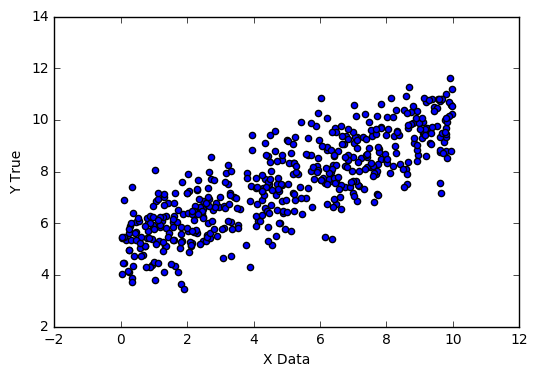

In [6]:
my_data.sample(n=500).plot(kind='scatter', x='X Data', y='Y True')

In [22]:
batch_size = 20

a = tf.Variable(0.81)
b = tf.Variable(0.17)

x = tf.placeholder(dtype=tf.float32, shape=[batch_size])
y = tf.placeholder(dtype=tf.float32, shape=[batch_size])

In [23]:
y_pred = a*x + b

error = tf.reduce_sum(tf.square(y - y_pred))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(error)

init = tf.global_variables_initializer()

In [24]:
rand_idx = np.random.randint(len(x_data), size=batch_size)

In [25]:
rand_idx

array([930957, 503040, 942058, 395619, 546411, 805538, 868271, 873343,
       436098, 760337, 800009, 517076, 569104, 482098, 376226, 776293,
       861365, 949765, 375854, 693157])

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    n_batches = 10000
    
    for i in range(n_batches):
        
        rand_idx = np.random.randint(len(x_data), size=batch_size)
        
        sess.run(optimizer, feed_dict={x: x_data[rand_idx], y: y_true[rand_idx]})
        
    model_a, model_b = sess.run([a,b])

In [32]:
model_a

0.53223014

In [33]:
model_b

4.993757

In [34]:
y_hat = x_data*model_a + model_b

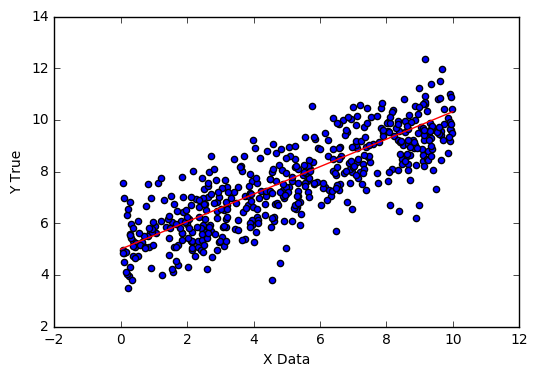

In [35]:
my_data.sample(n=500).plot(kind='scatter', x='X Data', y='Y True')
plt.plot(x_data, y_hat, 'r')

# Regression with estimator API

In [36]:
feature_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [37]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_model_dir': 'C:\\Users\\STRIKE~1\\AppData\\Local\\Temp\\tmp6k5hqcqi', '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_task_id': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000188E52A3668>, '_master': '', '_session_config': None, '_log_step_count_steps': 100, '_task_type': 'worker', '_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None}


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [44]:
x_train.shape

(700000,)

In [45]:
y_train.shape

(700000,)

In [46]:
input_function = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True) # 'x' is key on feature_cols

#
train_input_function = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)
test_input_function = tf.estimator.inputs.numpy_input_fn({'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [47]:
estimator.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\STRIKE~1\AppData\Local\Temp\tmp6k5hqcqi\model.ckpt.
INFO:tensorflow:step = 1, loss = 513.51843
INFO:tensorflow:global_step/sec: 574.902
INFO:tensorflow:step = 101, loss = 23.020464 (0.175 sec)
INFO:tensorflow:global_step/sec: 641.234
INFO:tensorflow:step = 201, loss = 21.971607 (0.155 sec)
INFO:tensorflow:global_step/sec: 602.604
INFO:tensorflow:step = 301, loss = 22.892815 (0.167 sec)
INFO:tensorflow:global_step/sec: 740.982
INFO:tensorflow:step = 401, loss = 19.216131 (0.135 sec)
INFO:tensorflow:global_step/sec: 637.148
INFO:tensorflow:step = 501, loss = 7.1342936 (0.157 sec)
INFO:tensorflow:global_step/sec: 662.466
INFO:tensorflow:step = 601, loss = 12.989644 (0.151 sec)
INFO:tensorflow:global_step/sec: 658.111
INFO:tensorflow:step = 701, loss = 12.523645 (0.152 sec)
INFO:tensorflow:global_step/sec: 666.881
INFO:tensorflow:step = 801, loss = 21.543373 (0.150 sec)
INFO:tensorflow:global

In [48]:
train_metrics = estimator.evaluate(input_fn=train_input_function, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-12-21:38:12
INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmp6k5hqcqi\model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-12-21:38:13
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0759645, global_step = 1000, loss = 8.607716


In [49]:
eval_metrics = estimator.evaluate(input_fn=test_input_function, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-06-12-21:39:12
INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmp6k5hqcqi\model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-12-21:39:13
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0910232, global_step = 1000, loss = 8.728186


In [51]:
print('Train data metrics')
print(train_metrics)
print('Test data metrics')
print(eval_metrics)

Train data metrics
{'global_step': 1000, 'average_loss': 1.0759645, 'loss': 8.607716}
Test data metrics
{'global_step': 1000, 'average_loss': 1.0910232, 'loss': 8.728186}


In [52]:
brand_new_data = np.linspace(0,10,10)

In [61]:
brand_new_data

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [54]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [56]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmp6k5hqcqi\model.ckpt-1000


[{'predictions': array([4.460138], dtype=float32)},
 {'predictions': array([5.120593], dtype=float32)},
 {'predictions': array([5.781048], dtype=float32)},
 {'predictions': array([6.4415026], dtype=float32)},
 {'predictions': array([7.101958], dtype=float32)},
 {'predictions': array([7.7624125], dtype=float32)},
 {'predictions': array([8.422868], dtype=float32)},
 {'predictions': array([9.083323], dtype=float32)},
 {'predictions': array([9.743778], dtype=float32)},
 {'predictions': array([10.404232], dtype=float32)}]

In [57]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\STRIKE~1\AppData\Local\Temp\tmp6k5hqcqi\model.ckpt-1000


In [58]:
predictions

[array([4.460138], dtype=float32),
 array([5.120593], dtype=float32),
 array([5.781048], dtype=float32),
 array([6.4415026], dtype=float32),
 array([7.101958], dtype=float32),
 array([7.7624125], dtype=float32),
 array([8.422868], dtype=float32),
 array([9.083323], dtype=float32),
 array([9.743778], dtype=float32),
 array([10.404232], dtype=float32)]

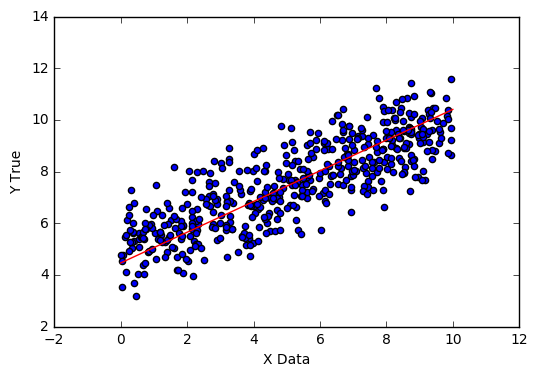

In [60]:
my_data.sample(n=500).plot(kind='scatter', x='X Data', y='Y True')
plt.plot(brand_new_data, predictions,'r')